In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import folium

import osmnx as ox
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import geoplot
import mapclassify

from folium.features import GeoJsonTooltip
from prettymaps import *
from descartes import PolygonPatch
from urllib.parse import urlencode
from mpl_toolkits.basemap import Basemap

# Geographic Information Systems

Geographic Information Systems (GIS) software is an umbrella term that covers software used to create, visualize, manage, and analyze geographic information. Since the shape of our planet is a geoid, GIS software has to pay specific attention to what type of projections one can use to display the data. Applications include route calculation for personal and commertial use, municipal management and planning, risk analysis, disaster management.

## A List of GIS Software

Here is a list of commonly used GIS software available today.

1. [QGIS](https://qgis.org/en/site/)
2. [ArcGIS](https://www.arcgis.com/home/index.html)
3. [GRASS GIS](https://grass.osgeo.org/)
4. [gvSIG](http://www.gvsig.com/en)
5. [Global Mapper](https://www.bluemarblegeo.com/global-mapper/)
6. [ILWIS](https://www.itc.nl/ilwis/) 

## A List of Python Libraries for GIS Tasks

1. [GDAL](https://gdal.org/)
2. [GeoPANDAS](https://geopandas.org/en/stable/)
3. [ArcPY](https://pro.arcgis.com/en/pro-app/latest/arcpy/get-started/what-is-arcpy-.htm)
4. [Folium](https://python-visualization.github.io/folium/quickstart.html)
5. [iPyLeaflet](https://github.com/jupyter-widgets/ipyleaflet)
6. [geemap](https://github.com/giswqs/geemap)

## A List of GIS Data Sources

1. [World Bank](https://data.worldbank.org/)
2. [UN Geospatial Hub](https://geoservices.un.org/webapps/geohub/)
1. [Natural Earth](https://www.naturalearthdata.com/)
3. [Open Street Map](https://www.openstreetmap.org/)
2. [Global Map](https://www.gsi.go.jp/kankyochiri/globalmap_e.html)
2. [Libre Map Project](http://libremap.org/)
3. [Open Topography Project](https://opentopography.org/)
3. [Infrastructure for Spatial Information in the European Community](http://inspire.jrc.ec.europa.eu/)
3. [European Environmental Agency](https://www.eionet.europa.eu/workspace/gis)
4. [GeoSpation Data from Government of Canada](http://www.geogratis.gc.ca/)

## A List of Satellite Imagery Data Sources

1. [NASA](https://worldview.earthdata.nasa.gov/)
2. [ESA](https://earth.esa.int/eogateway/catalog)
3. [USGS Earth Explorer](https://earthexplorer.usgs.gov/)
4. [Copernicus Open Access Hub](https://scihub.copernicus.eu/dhus/#/home)
5. [NOAA Data](https://coast.noaa.gov/dataviewer/#)
6. [Bhuvan Indian Geo-Platform of ISRO](https://bhuvan-app3.nrsc.gov.in/data/download/index.php)
6. [Maxar Open Data](https://www.maxar.com/open-data)

# A List of GIS Formats and Geospatial File Extensions 

## Vector Formats

1. ESRI Shapefiles (.SHP, .DBF, .SHX): ESRI shapefile is a standard geospatial file format. The
folllowing three file types are mandatory for a shapefile: DBF (attribute data), SHP (feature
geometry) and SHX (shape index positions). The following files are optional: PRJ (the projection
system), SBN (spatial index to optimize queries), and SBX (to optimize file uptake).

2. Geographic JSON (.GEOJSON, .JSON): GeoJSON is a human-readable data format that encodes data in a
variant of JSON which usually has less markup overhead compared to other markup languages GML.

3. Geography Markup Language (.GML): GML is another human-readable data format. It is a variant of
XML, and is very verbose compared to GEOJSON.

4. Open Street Map Files (.OSM): OSM is another XML-based file format used by the largest
crowdsourcing GIS data project in the world.  OSM also uses a smaller alternate format PBF
(Protocolbuffer Binary Format) which is again based on XML.

5. Google Keyhole Markup Language (.KML, .KMZ): This is another XML variant used primarily for
Google Earth. There is also a compressed version (KMZ).

6. GPS exchange format (.GPX): This too is a variant of XML that encodes data captured by GPS
receivers, and primarily used for data exchange between GPS software.  GPX records latitude and
longitude coordinates, location, time, and elevation.

7. US Census Bureau file formats: Digital Line Graph (DLG) and Geographic Base File-Dual Independent
Mask Encoding (GBF-DIME). DLG files encode information for topographic maps such as contour lines,
roads, railroads, towns, and township lines. Much of the U.S. Bureau of Census Topologically
Integrated Geographic Encoding and Referencing (TIGER) data stored in DLG format. GBF-DIME format
is used mainly for encoding US road network in major urban areas.


## Raster Formats

All raster data formats consist of pixels.

1. ASCII Grid Files (.ASC): ASC files are specially formatted CSV files with a header.

2. GeoTIFF Files (.TIFF, .OVR): GeoTIFF is a variant of the TIFF format which is originally an image
format. Usually GeoTIFF files come with other files: XML (for metadata), TFW (for raster location),
AUX (projection information), OVR (to imporove raster display).

3. ERDAS Image Files (.IMG): IMG format is a hiearchical data format that can store hyperspectral
images along with information about ground control points, sensors, or projections.

4. ESRI Grid Files (.ADF): ADF files encode data in a grid. The grid can be an integer grid (such as
land cover) or floating point grid (such as elevation.) Attribute data usually is stored alongside
in a separate file.

5. ENVI Raster Files (.BIL, .BIP, .BSQ): Band Interleaved data files come in 3 varieties. These
varieties encode hyperspectral images by lines, by pixel, and by sequence. They usually come with a
separate header file (HDR) that contains some metadata for the images such as size, depth, layout
etc.


## Compressed Raster Formats

There are two types of compression formats: lossless formats and lossy formats. With the lossless
formats, when we uncompress it we get a perfect copy of the original file. With the lossy formats we
permanently delete some redundant information that may cause loss of certain features in the
reconstructed image such as reduction in resolution, color, or some other details.

1. Joint Photographic Experts Group (.JPEG2000, .JPG2000, .JP2): JPEG2000 format uses a compression
algorithm based on wavelets which routinely reaches a compression ratio of 20:1. JP2 Files are
usually accompanied with other files that contain auxillary information such as geolocation.

2. Enhanced Compressed Wavelets (.ECW): Originall developed by a company called *ER Mapper*, ECW
files also use wavelets for compression. Typically used for aerial and satellite imagery, has good
compression ratios and maintain high quality contrasts in images.

## Elevation File Formats

Elevation file formats encode elevation values in a raster grid.

1. The USGS DEM and Canadian CDED capture files (.DEM): The format is a raster-based ASCII format
and is developed originally by the USGS. The encoded information contain names, elevation bounds
(min and max), boundaries, elevation profiles, and accuracy.

2. Digital Terrain Elevation Data (.DT0, .DT1, .DT2): The format is another raster format developed
by US National Geospatial Intelligence Agency.  Grid sizes are 1km, 100m, or 30m for DT0, DT1 and
DT2 files, respectively. User-defined attributes are kept in accompanying files.


## LiDAR File Formats

Light Detection and Ranging (LiDAR) equipments generate a dense network of coordinate points with
elevation values. 

1. Plain Point Clouds (.XYZ): The format is a special CSV format where we have the X, Y and Z
coordinates. But there's no standard specification so it may include RGB, intensity values and other
LiDAR values.

2. ASPRS LIDAR Data Exchange Format (.LAS, .LASD, .LAZ): The LAS format is an open binary format
designed for data interchange. The compression used in LAZ format is lossless. 


* [Free Satellite Imagery Data Sources](https://gisgeography.com/free-satellite-imagery-data-list/)
* [Free Global DEM Data Sources -- Digital Elevation Models](https://gisgeography.com/free-global-dem-data-sources/)
* [Free LiDAR Data Sources](https://gisgeography.com/top-6-free-lidar-data-sources/)


## EXAMPLES

In [2]:
m = folium.Map(location=[41.105, 29.025], width=1200,height=600,  zoom_start=15)

folium.Marker([41.107, 29.0242], 
               popup="<i>Fen Edebiyat Fakültesi</i>", 
               tooltip="We are here!").add_to(m)

m

In [3]:
landslides = pd.read_csv('https://data.nasa.gov/api/views/dd9e-wu2v/rows.csv?accessType=DOWNLOAD')
landslidesTR = landslides[landslides['country_code'] == 'TR']
landslidesTR[['event_date','admin_division_name','gazeteer_closest_point','longitude','latitude']]

,event_date,admin_division_name,gazeteer_closest_point,longitude,latitude
971,09/23/2009 08:00:00 PM,Artvin,Borçka,41.6822,41.3639
1155,07/16/2013 08:00:00 AM,Hatay,Hassa,36.4354,36.7619
1224,08/24/2015 12:00:00 AM,Artvin,Hopa,41.4323,41.3936
2030,09/09/2008 12:00:00 AM,Siirt,Gözpınar,41.5061,37.9472
2319,07/07/2016 11:00:00 PM,Trabzon,Dağbaşı,39.9081,40.8167
2608,09/09/2009 12:00:00 AM,Istanbul,Eminönü,28.9759,41.0124
2700,03/07/2013 12:00:00 AM,Hakkâri,Çukurca,43.6143,37.2506
2780,11/21/2009 12:00:00 AM,Trabzon,Trabzon,39.7365,40.9792
2958,01/27/2013 12:00:00 AM,Diyarbakır,Diyarbakır,40.2306,37.9152
3406,09/28/2008 12:00:00 AM,Sakarya,Karapürçek,30.4580,40.6900


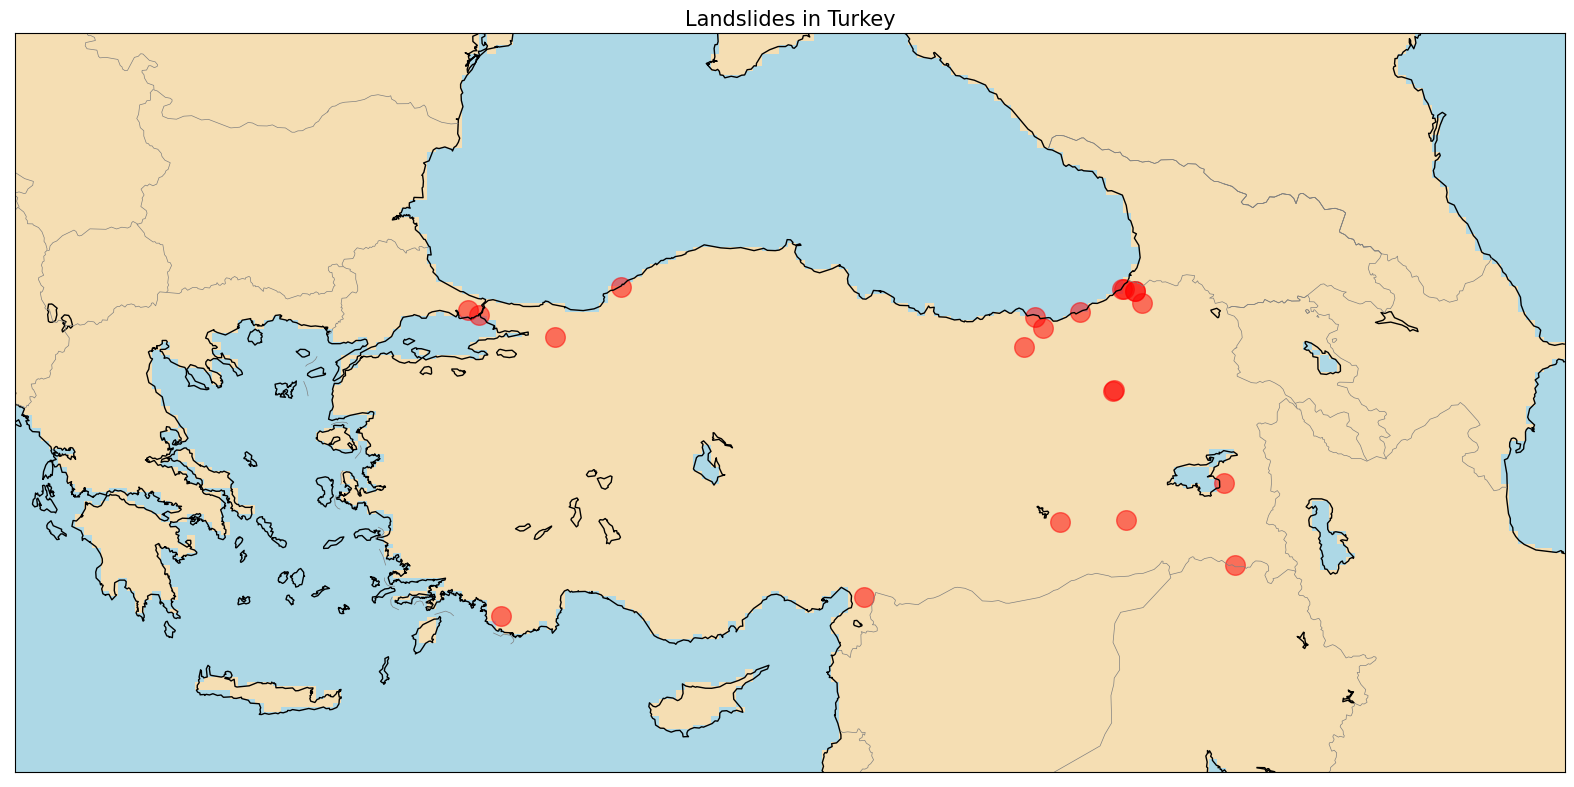

In [4]:
fig = plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=34,
           urcrnrlat=45,
           llcrnrlon=20,
           urcrnrlon=50,
           resolution='i')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='wheat', ocean_color='lightblue')

xs,ys = m(landslidesTR['longitude'], landslidesTR['latitude'])
m.scatter(xs, ys, c='red', s=200, alpha=0.5)

plt.title("Landslides in Turkey", fontdict={"fontsize": 15}, pad=5);

In [5]:
baseurl = 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?'

params = {'starttime': '1995-01-01',
          'endtime': '2022-12-01',
          'minlatitude': 39,
          'maxlatitude': 43,
          'minlongitude': 23,
          'maxlongitude': 33,
          'minmagnitude': 3.0,
          'eventtype': 'earthquake',
          'producttype': 'origin'}

quakes = pd.read_csv(baseurl + urlencode(params))
quakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-11-27T03:57:45.682Z,40.8392,30.9877,10.000,4.1,mb,49.0,46.0,0.401,0.65,...,2022-11-27T14:28:36.534Z,"14 km W of Düzce, Turkey",earthquake,4.08,1.929,0.185,8.0,reviewed,us,us
1,2022-11-23T03:50:58.239Z,40.8175,30.9249,10.000,4.4,mwr,53.0,34.0,0.403,0.67,...,2022-11-29T04:21:00.046Z,"15 km E of Hendek, Turkey",earthquake,4.67,1.779,0.080,15.0,reviewed,us,us
2,2022-11-23T01:08:15.522Z,40.8471,30.9670,10.000,6.1,mww,114.0,30.0,0.414,0.99,...,2022-12-01T20:09:40.221Z,"16 km W of Düzce, Turkey",earthquake,5.15,1.729,0.052,35.0,reviewed,us,us
3,2022-09-15T14:48:30.350Z,39.5114,23.6109,10.000,4.5,mb,32.0,44.0,1.047,1.16,...,2022-11-19T23:03:17.040Z,"40 km NNE of Skiáthos, Greece",earthquake,6.17,1.921,0.156,12.0,reviewed,us,us
4,2022-07-21T15:44:25.229Z,40.1461,27.3855,26.557,4.3,mwr,84.0,34.0,1.260,0.86,...,2022-09-27T16:57:12.040Z,"15 km SE of Biga, Turkey",earthquake,3.82,4.788,0.068,21.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,1995-01-08T22:53:16.840Z,39.7860,30.3880,5.000,3.2,md,NaN,NaN,NaN,1.30,...,2014-11-07T00:57:06.920Z,"11 km W of Eski?ehir, Turkey",earthquake,NaN,NaN,NaN,NaN,reviewed,us,isk
3490,1995-01-08T22:50:56.540Z,39.7730,30.8140,5.000,3.1,md,NaN,NaN,NaN,0.60,...,2014-11-07T00:57:06.918Z,"10 km E of Sevinç, Turkey",earthquake,NaN,NaN,NaN,NaN,reviewed,us,isk
3491,1995-01-08T22:29:57.340Z,39.7960,30.5080,10.000,3.7,md,NaN,NaN,NaN,0.90,...,2014-11-07T00:57:06.907Z,"2 km NNW of Eski?ehir, Turkey",earthquake,NaN,NaN,NaN,NaN,reviewed,us,isk
3492,1995-01-08T13:08:54.980Z,39.3290,25.5500,27.000,4.2,mb,NaN,NaN,NaN,0.90,...,2014-11-07T00:57:06.860Z,"37 km WNW of Eresós, Greece",earthquake,NaN,2.300,NaN,18.0,reviewed,us,us


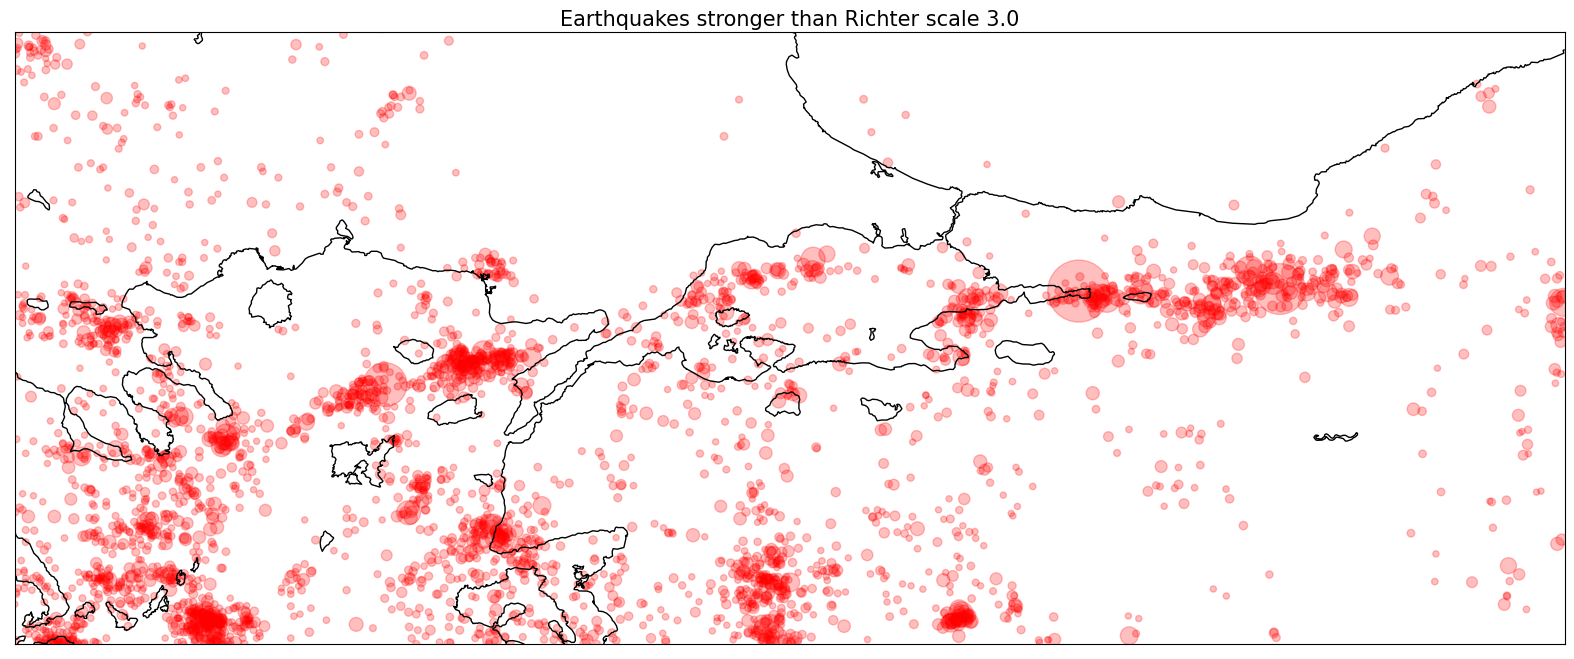

In [6]:
plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=39,
           urcrnrlat=42,
           llcrnrlon=23,
           urcrnrlon=33,
           resolution='h')

m.drawcoastlines()

xs,ys = m(quakes['longitude'], quakes['latitude'])
ss = np.exp(quakes['mag'])
m.scatter(xs, ys, c='red', s=ss, alpha=0.25)

plt.title("Earthquakes stronger than Richter scale 3.0", fontdict={"fontsize": 15}, pad=5);

In [7]:
map = folium.Map(location=[quakes['latitude'].mean(), 
                           quakes['longitude'].mean()], 
                 width=1800,height=600,
                 zoom_start=8,
                 control_scale=True)

def helper(x):
    return f'<b>Magnitude: {x[0]}</b><br>{x[1]}'

for index, location_info in quakes.iterrows():
    if location_info['mag']>4.5:
        folium.Marker([location_info["latitude"], location_info["longitude"]], 
                      popup=helper(location_info[['mag','time']])).add_to(map)
    
map

In [8]:
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
unemployment = pd.read_csv(state_unemployment)

us = gpd.read_file(state_geo)
us = us.rename(columns={'name': 'NAME', 'id': 'State'})
pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/state/totals/NST-EST2021-alldata.csv')
geo = us.merge(pop,on='NAME').merge(unemployment,on='State')

<AxesSubplot: >

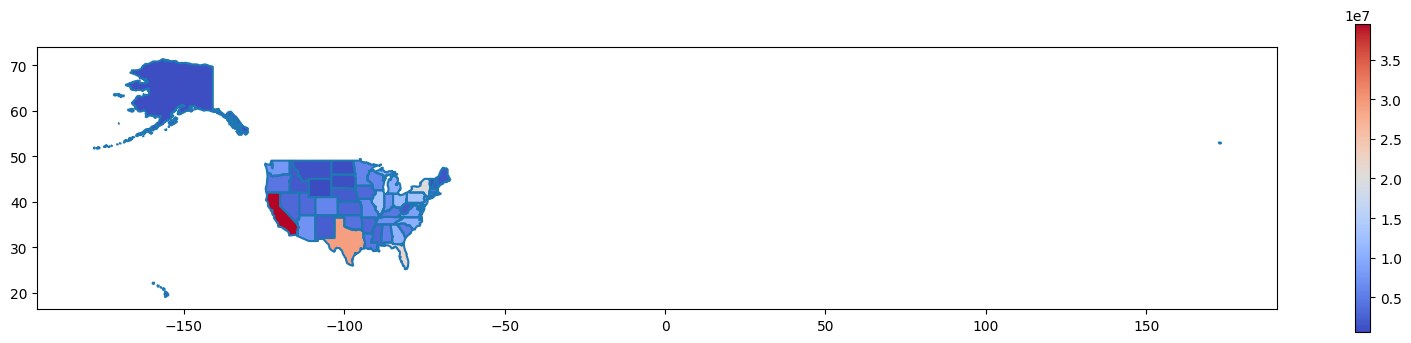

In [9]:
ax = geo.boundary.plot(figsize=(20,4))
geo.plot(ax=ax, column='POPESTIMATE2020', 
         cmap='coolwarm', legend=True)

In [10]:
continentalUS = ['Alabama', 'Arizona', 'Arkansas', 'California', 
                 'Colorado','Connecticut', 'Delaware', 'Florida', 'Georgia', 
                 'Idaho','Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
                 'Louisiana','Maine', 'Maryland', 'Massachusetts', 'Michigan',
                 'Minnesota','Mississippi', 'Missouri', 'Montana', 'Nebraska',
                 'Nevada','New Hampshire', 'New Jersey', 'New Mexico', 
                 'New York','North Carolina', 'North Dakota', 'Ohio', 
                 'Oklahoma', 'Oregon','Pennsylvania', 'Rhode Island', 
                 'South Carolina','South Dakota','Tennessee', 'Texas', 
                 'Utah', 'Vermont', 'Virginia', 'Washington','West Virginia',
                 'Wisconsin', 'Wyoming']

geo.index = geo['NAME']
continental = geo.loc[continentalUS,:]
continental.head()

,State,NAME,geometry,SUMLEV,REGION,DIVISION,STATE,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,NETMIG2021,RESIDUAL2020,RESIDUAL2021,RBIRTH2021,RDEATH2021,RNATURALINC2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021,Unemployment
NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",40,3,6,1,5024279,5024803,5039877,...,23380,-75,242,11.191613,12.890226,-1.698613,0.247201,4.398749,4.645950,7.1
Arizona,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",40,4,8,4,7151502,7177986,7276316,...,97504,-3,-6,10.584669,10.469547,0.115121,0.619608,12.871739,13.491347,8.1
Arkansas,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",40,3,7,5,3011524,3012232,3025891,...,16840,-15,55,11.599962,12.671819,-1.071856,0.272932,5.304960,5.577892,7.2
California,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",40,4,9,6,39538223,39499738,39237836,...,-352960,858,-938,10.778412,8.441637,2.336775,0.364223,-9.329701,-8.965478,10.1
Colorado,CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",40,4,8,8,5773714,5784308,5812069,...,14731,168,343,10.464475,8.276378,2.188097,0.289228,2.251393,2.540621,7.7


Text(0.5, 1.0, 'Population Estimate 2020')

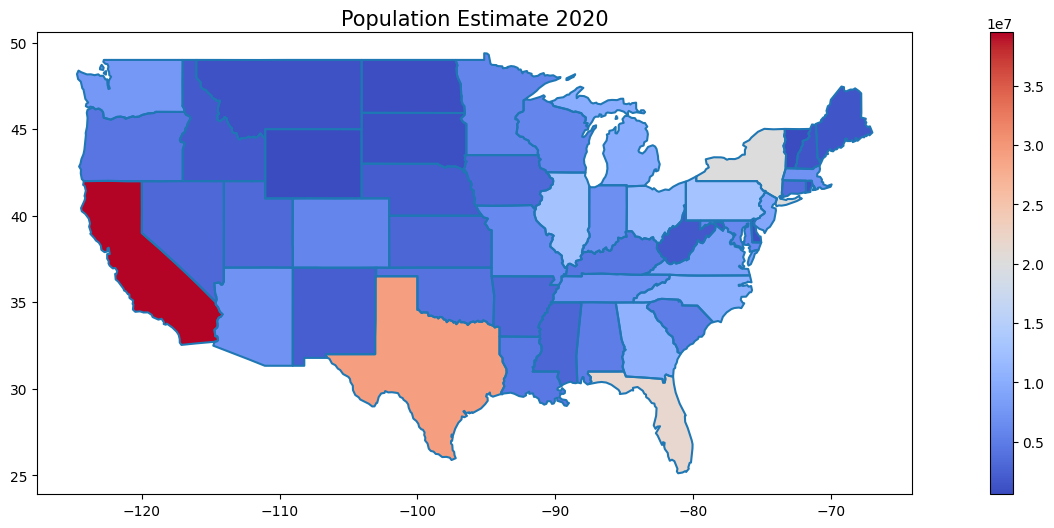

In [11]:
ax = continental.boundary.plot(figsize=(20, 6))
continental.plot(ax=ax, column='POPESTIMATE2020', cmap='coolwarm', legend=True)
plt.title("Population Estimate 2020", fontdict={"fontsize": 15}, pad=5)

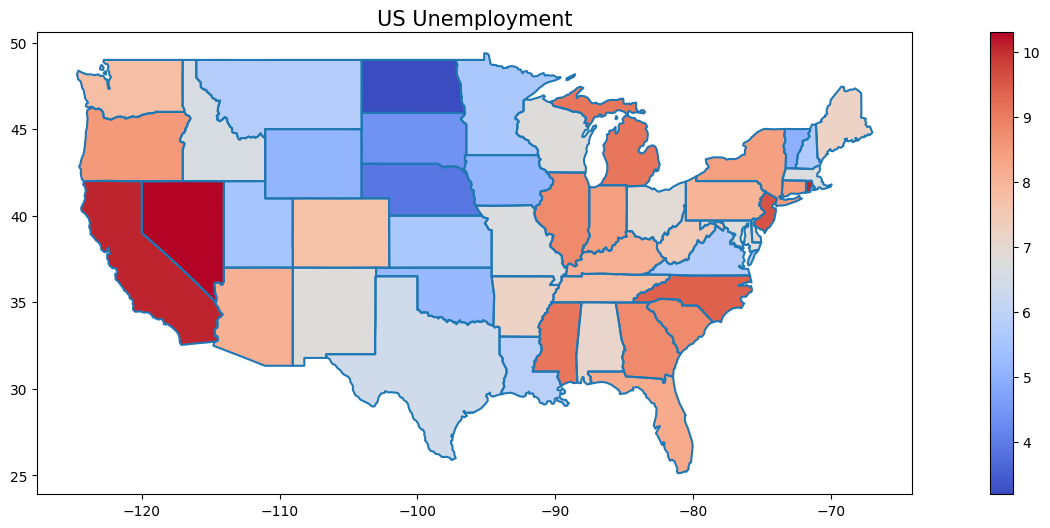

In [12]:
ax = continental.boundary.plot(figsize=(20, 6))
continental.plot(ax=ax, column='Unemployment', cmap='coolwarm', legend=True)
plt.title("US Unemployment", fontdict={"fontsize": 15}, pad=5);

/home/kaygun/.local/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


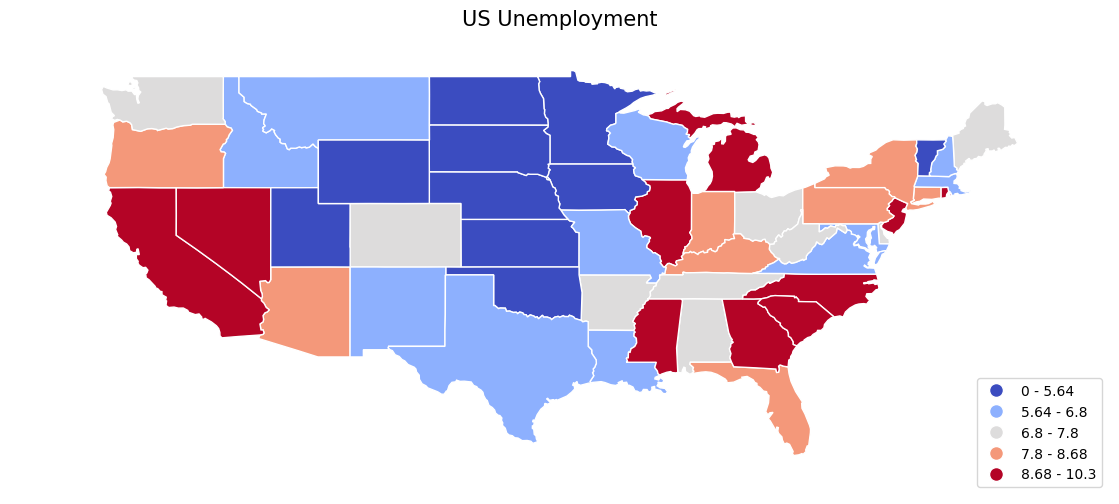

In [13]:
geoplot.choropleth(continental,
                   hue="Unemployment",
                   scheme=mapclassify.Quantiles(continental['Unemployment'], k=5),
                   cmap="coolwarm", edgecolor="white",
                   figsize=(20,6), 
                   legend=True,
                   legend_kwargs={'loc': 'lower right'}
                  )

plt.title("US Unemployment", fontdict={"fontsize": 15}, pad=5);


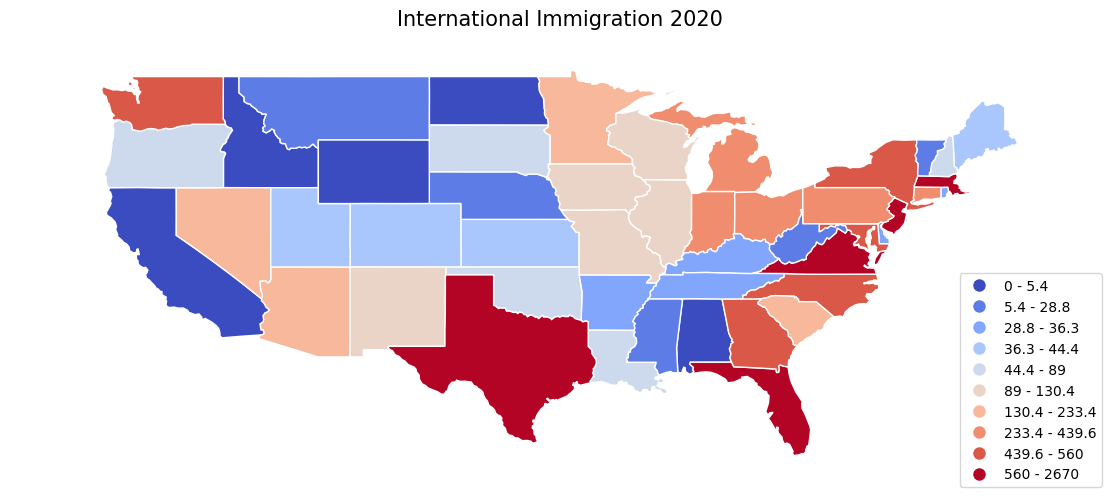

In [14]:
geoplot.choropleth(continental,
                   hue='INTERNATIONALMIG2020',
                   scheme=mapclassify.Quantiles(continental['INTERNATIONALMIG2020'], k=10),
                   cmap="coolwarm", edgecolor="white",
                   figsize=(20,6), 
                   legend = True,
                   legend_kwargs={'loc': 'lower right'}
                  )

plt.title("International Immigration 2020", fontdict={"fontsize": 15}, pad=5);

In [15]:
m = folium.Map(location=[46, -101], width=1000, height=600, zoom_start=3)

folium.Choropleth(
    name='choropleth',
    geo_data=state_geo,
    data=unemployment,
    key_on='feature.id',
    columns=['State','Unemployment'],
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment"
).add_to(m)

m

In [16]:
m = folium.Map(location=[46, -101],width=1000,height=600,zoom_start=3)

folium.Choropleth(
    name='choropleth',
    geo_data=state_geo,
    data=geo,
    key_on='feature.id',
    columns=['State','POPESTIMATE2020'],
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Population",
).add_to(m)

m

In [ ]:
areaBesiktas = ox.geocode_to_gdf("Beşiktaş, İstanbul, Turkey")
graphBesiktas = ox.graph_from_place("Beşiktaş, İstanbul, Turkey")
nodesBesiktas, edgesBesiktas = ox.graph_to_gdfs(graphBesiktas)

buildingsBesiktas = ox.geometries_from_place("Beşiktaş, İstanbul, Turkey", tags={'building':True})
parksBesiktas = ox.geometries_from_place("Beşiktaş, İstanbul, Turkey", tags={'leisure':True})

/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/home/kaygun/.local/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/home/kaygun/.local/lib/python3.10/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/home/kaygun/.local/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in S

In [ ]:
fix,ax = plt.subplots(figsize=(24,18))
areaBesiktas.plot(ax=ax,facecolor='wheat')
edgesBesiktas.plot(ax=ax,edgecolor='black')
buildingsBesiktas.plot(ax=ax,facecolor="red",alpha=0.9)
parksBesiktas.plot(ax=ax,facecolor='green')